# 讀取宏達電(2498) 的2014年資料以及三因子資料

## (a)利用2014年度的數據建立CAPM模型

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 獲取指數資料
indexData = pd.read_csv('003/index.csv', sep = '\t')
np.unique(indexData.CoName)

array(['TSE Taiex    ', 'TW 50 INDEX  ', 'TW MID-CAP INDEX',
       'TWSE CG100 TR Index', 'Taiwan HC 100'], dtype=object)

In [3]:
mktData = indexData[indexData.CoName == 'TSE Taiex    ']
mktData.head()

,CO_ID,CoName,Date,ROI
0,Y9999,TSE Taiex,2014/01/02,0.0120
3,Y9999,TSE Taiex,2014/01/03,-0.7663
6,Y9999,TSE Taiex,2014/01/06,-0.5444
9,Y9999,TSE Taiex,2014/01/07,0.1446
12,Y9999,TSE Taiex,2014/01/08,0.5135


In [4]:
mktret = pd.Series(mktData.ROI.values,index = pd.to_datetime(mktData.Date))
mktret.name = 'mktret'
mktret.head()

Date
2014-01-02       0.0120
2014-01-03      -0.7663
2014-01-06      -0.5444
2014-01-07       0.1446
2014-01-08       0.5135
Name: mktret, dtype: object

In [5]:
# 獲取宏達電(2498)收益率資料
HTC = pd.read_csv('2498.csv', sep = ',')
HTC.index = pd.to_datetime(HTC.Date)
HTCret = HTC.ROI
HTCret.name = 'returns'

In [6]:
HTC.head()

,Date,Date.1,Close,Open,High,Low,Volume,ROI
Date,,,,,,,,
2014-01-02,2014-01-02,2014-01-02,137.58,140.56,141.06,137.09,7964,-1.7730
2014-01-03,2014-01-03,2014-01-03,137.58,137.58,140.07,137.09,6599,0.0000
2014-01-06,2014-01-06,2014-01-06,132.62,137.58,138.58,132.12,14005,-3.6101
2014-01-07,2014-01-07,2014-01-07,130.13,131.62,132.62,128.64,13705,-1.8727
2014-01-08,2014-01-08,2014-01-08,129.14,130.13,131.62,129.14,7623,-0.7634


In [7]:
retData = pd.concat([HTCret,mktret],axis=1).dropna()

In [8]:
# ROI數據的單位是%，所以乘以0.01轉變成實際收益率
retData = retData.astype(np.float) * 0.01

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [9]:
retData.head()

,returns,mktret
Date,,
2014-01-02,-0.017730,0.000120
2014-01-03,0.000000,-0.007663
2014-01-06,-0.036101,-0.005444
2014-01-07,-0.018727,0.001446
2014-01-08,-0.007634,0.005135


In [10]:
# 計算風險收益率
rf = 1.0038 ** (1/360) - 1
rf

1.053560616215421e-05

In [11]:
# 計算股票超額收益率和市場風險溢酬
Excess_ret = retData['2014'] - rf
Excess_ret.tail()

c:\users\a9025\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,returns,mktret
Date,,
2014-12-26,0.018508,0.006035
2014-12-27,-0.000011,0.000470
2014-12-29,-0.000011,0.007342
2014-12-30,0.021807,-0.001933
2014-12-31,0.010665,0.004178


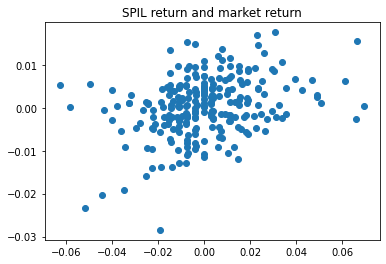

In [12]:
# 畫出散佈圖
import matplotlib.pyplot as plt
plt.title('SPIL return and market return')
plt.scatter(Excess_ret.values[:,0],Excess_ret.values[:,1])

In [13]:
# 擬合CAMP模型
import statsmodels.api as sm
model = sm.OLS(Excess_ret.returns[1:], sm.add_constant(Excess_ret.mktret[1:]))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     28.37
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.27e-07
Time:                        14:14:04   Log-Likelihood:                 621.72
No. Observations:                 247   AIC:                            -1239.
Df Residuals:                     245   BIC:                            -1232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.308e-05      0.001     -0.010      0.992      -0.002       0.002
mktret         0.9634      0.181      5.326      0.000       0.607       1.320
==============================================================================
Omnibus:                       15.204   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.797
Skew:                           0.295   Prob(JB):                     3.39e-07
Kurtosis:                       4.596   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## (b)利用2014年度的數據建立三因子模型

In [14]:
stock=pd.read_csv('retdata.csv',sep='\t')
stock.head(n=3)

,Date,Hon Hai Precision,TSMC,Uni-President
0,2014-01-02,0.3745,-0.9479,0.5587
1,2014-01-03,-1.2438,-1.9139,-0.9259
2,2014-01-06,-0.5038,0.0000,0.0000


In [15]:
stock.index = pd.to_datetime(stock.Date)
UniPresident = stock.iloc[:,3]
UniPresident.head(n=3)

Date
2014-01-02    0.5587
2014-01-03   -0.9259
2014-01-06    0.0000
Name: Uni-President, dtype: float64

In [16]:
factors=pd.read_csv('factors.csv',sep=',')
factors.head(n=3)

,Security Name,CoName,YY/MM/DD,Market Risk Premium,Size Factor (3 Factor),Book to Market Factor,Risk-free Interest Rate
0,Z8888,TSEC+GreTai Non-Banking index,2014/01/02,0.0145,0.7197,0.3039,1.355
1,Z8888,TSEC+GreTai Non-Banking index,2014/01/03,-0.5858,0.6868,1.0533,1.355
2,Z8888,TSEC+GreTai Non-Banking index,2014/01/06,-0.4534,0.5783,0.4498,1.355


In [17]:
factors.index =pd.to_datetime(factors['YY/MM/DD']) 
factors.columns

Index(['Security Name', 'CoName', 'YY/MM/DD', 'Market Risk Premium',
       'Size Factor (3 Factor)', 'Book to Market Factor',
       'Risk-free Interest Rate'],
      dtype='object')

In [18]:
factors['Risk-free Interest Rate']=(factors['Risk-free Interest Rate']**(1/360)-1)*100
factors.head(n=3)

,Security Name,CoName,YY/MM/DD,Market Risk Premium,Size Factor (3 Factor),Book to Market Factor,Risk-free Interest Rate
YY/MM/DD,,,,,,,
2014-01-02,Z8888,TSEC+GreTai Non-Banking index,2014/01/02,0.0145,0.7197,0.3039,0.084425
2014-01-03,Z8888,TSEC+GreTai Non-Banking index,2014/01/03,-0.5858,0.6868,1.0533,0.084425
2014-01-06,Z8888,TSEC+GreTai Non-Banking index,2014/01/06,-0.4534,0.5783,0.4498,0.084425


In [19]:
data=pd.concat([UniPresident,factors.iloc[:,1:]],axis=1).dropna()
data.tail(n=3)

,Uni-President,CoName,YY/MM/DD,Market Risk Premium,Size Factor (3 Factor),Book to Market Factor,Risk-free Interest Rate
2014-12-29,1.1134,TSEC+GreTai Non-Banking index,2014/12/29,0.7341,-0.2407,-0.4195,0.084425
2014-12-30,0.1001,TSEC+GreTai Non-Banking index,2014/12/30,-0.1990,0.1720,-0.2125,0.084425
2014-12-31,0.4000,TSEC+GreTai Non-Banking index,2014/12/31,0.4774,0.0670,-0.2604,0.084425


In [20]:
data['Uni-President'] = data['Uni-President'] - data['Risk-free Interest Rate']

In [21]:
data['Uni-President']

2014-01-02    0.474275
2014-01-03   -1.010325
2014-01-06   -0.084425
2014-01-07   -0.271325
2014-01-08   -0.458925
                ...   
2014-12-26   -0.084425
2014-12-27   -0.084425
2014-12-29    1.028975
2014-12-30    0.015675
2014-12-31    0.315575
Name: Uni-President, Length: 248, dtype: float64

In [22]:
# 選擇市場溢酬因子、規模因子、淨值市價比因子作為影響因子去輸入
data.iloc[:,3:6]

,Market Risk Premium,Size Factor (3 Factor),Book to Market Factor
2014-01-02,0.0145,0.7197,0.3039
2014-01-03,-0.5858,0.6868,1.0533
2014-01-06,-0.4534,0.5783,0.4498
2014-01-07,0.1950,0.4554,0.7056
2014-01-08,0.6204,-0.0295,0.2259
...,...,...,...
2014-12-26,0.6399,-0.2479,0.0360
2014-12-27,0.1055,0.5418,0.0852
2014-12-29,0.7341,-0.2407,-0.4195
2014-12-30,-0.1990,0.1720,-0.2125


In [23]:
import statsmodels.api as sm
regThrFac=sm.OLS(data['Uni-President'],sm.add_constant(data.iloc[:,3:6]))
result=regThrFac.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Uni-President   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     33.68
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.99e-18
Time:                        14:14:04   Log-Likelihood:                -393.91
No. Observations:                 248   AIC:                             795.8
Df Residuals:                     244   BIC:                             809.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1174      0.076     -1.543      0.124      -0.267       0.032
Market Risk Premium        1.0794      0.112      9.622      0.000       0.858       1.300
Size Factor (3 Factor)    -0.0568      0.159     -0.357      0.722      -0.371       0.257
Book to Market Factor     -0.0142      0.208     -0.068      0.946      -0.424       0.396
==============================================================================
Omnibus:                       46.399   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.846
Skew:                           0.435   Prob(JB):                     1.31e-75
Kurtosis:                       8.711   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result.params

const                    -0.117379
Market Risk Premium       1.079372
Size Factor (3 Factor)   -0.056831
Book to Market Factor    -0.014195
dtype: float64

## (c)分別使用建構的CAPM模型與三因子模型估計宏達電2015年1月的收益率，分別比較兩者的結果

#### CAPM模型的R-squared是0.104，而三因子模型的R-squared為0.293，因此三因子模型的準確性相較CAPM模型要好些，對數據的擬合也較好